In [1]:
"""
Note:-
    * All the code is done on Windows Environment
    * Jupyter notebook is used to make the code
    
Steps:-
    1. Make sure you have chromedriver installed on the machine
    2. Install packages using command on cmd :- "pip install selenium bs4 pandas"
"""
import pyodbc
import pandas as pd
from time import sleep
from bs4 import BeautifulSoup
from selenium import webdriver
import matplotlib.pyplot as plt
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

def cm_to_inch(value):
    return value/2.54

# * Enter path to chromedriver.exe before execution
path = r"C:\Users\disha\AppData\Local\Programs\Python\Python39\Scripts\chromedriver.exe"

options = Options()
# * Set PROXY servers here
# PROXY =   "138.197.32.120:3128" 
# options.add_argument('--proxy-server=%s' % PROXY)
options.headless = True
driver = webdriver.Chrome(
    executable_path=path,
    options=options)

driver.get("https://www.impactguru.com/fundraisers")
driver.maximize_window()

In [2]:
class web_scraper():
    """
    Web Scraper Bot
    """
    def __init__(self):
        print("Web Scraper Initiated")
        global taxb, urgent, des, img, name, amt_got, per_needed
        taxb, urgent, des, img, name, amt_got, per_needed = [], [], [], [], [], [], []

    def click_load_button(self):
        """
        This function will terminate when the "Load More" Button
        is not detected on to the website
        """
        for press in range(1000):
            timeout = 20
            try:
                element_present = EC.presence_of_element_located(
                    (By.ID, 'loadMoreBtn'))
                WebDriverWait(driver, timeout).until(element_present)
                driver.find_element(By.ID, "loadMoreBtn").click()
                sleep(5)
            except TimeoutException:
                print("Timed Out")
                break
            except Exception as e:
                print("No Load Button Detected..!!")
                break


    def get_data(self):
        """
        Data Cleaning & Collection Done
        """
        try:
            for k in range(1,100):
                data_lake = driver.find_element_by_xpath(f'//*[@id="campaignCards"]/div[{k}]/div').text.split("\n")
                if data_lake[0].replace(" ",'') == "TAXBENEFITS":
                    taxb.append(1)
                else:
                    taxb.append(0)

                if data_lake[1].replace(" ",'') == "URGENT":
                    urgent.append(1)
                else:
                    urgent.append(0)

                des.append(data_lake[2])
                name.append(data_lake[3].replace("by ",'').replace(" by",''))
                try:
                    amt_got.append(int(data_lake[5].replace("Raised",'').replace("₹",'').replace(",",'').replace(" ",'').replace(".",'')))
                except Exception as e:
                    amt_got.append(0)
                try:
                    per_needed.append(int(100-int(data_lake[6].replace(" ",'').replace("%",''))))
                except Exception as e:
                    per_needed.append(0)

                img.append(driver.find_element_by_xpath(f'//*[@id="campaignCards"]/div[{k}]/div/a/img').get_attribute('src'))

        except Exception as e:
            print("Done Scraping Data")


In [3]:
ws = web_scraper()
ws.click_load_button()
ws.get_data()

len(taxb), len(urgent), len(des), len(img), len(name), len(amt_got), len(per_needed)

Web Scraper Initiated
No Load Button Detected..!!
Done Scraping Data


(89, 89, 89, 89, 89, 89, 89)

In [4]:
data = pd.DataFrame({"NAME":name,"TAX_BENEFIT":taxb,"URGENT":urgent,"DESCRIPTION":des,"INR_FUND_RECIVED":amt_got,
                     "PERCENTAGE_REQUIRED":per_needed,"IMAGE_LINK":img})
data.to_csv("Medical_Case.csv", index=False)

# * Below Code Can Be Used For Bluk Insert To SQL DataBase.
# path = r"C:/Users/Dishant_Try/Codes_Developed/Medical_Case.csv"
# status_code = 0
# pyodbc.drivers()
# Conn = pyodbc.connect(r'DRIVER={SQL Server Native Client 11.0};'
#                       'SERVER=;'
#                       'DATABASE=;'
#                       "UID=;"
#                       "PWD=;"
#                       'Trusted_Connection=no;')
# cur = Conn.cursor()
# sql = """
# BULK INSERT DummyBackup.dbo.AEGON
# FROM "{}" WITH (
#     KEEPNULLS, FIELDTERMINATOR = ',',
#     ROWTERMINATOR = '\n'
#     );
# """.format(path)

# try:
#     cur.execute(sql)
#     Conn.commit()
#     cur.close()
#     print("PASS")
# except pyodbc.Error as ex:
#     status_code = 1
#     print("FAIL")

In [5]:
data

,NAME,TAX_BENEFIT,URGENT,DESCRIPTION,INR_FUND_RECIVED,PERCENTAGE_REQUIRED,IMAGE_LINK
0,Rahul And Astha Pathak,1,1,Help Arya get the world’s most expensive drug ...,2740721,98,https://d2aq6dqxahe4ka.cloudfront.net/assets/u...
1,Mr Avinash,1,1,Please Help Me To Raise Funds For My Son's Tre...,1277726,63,https://img.youtube.com/vi/YXUO4zQcJvg/0.jpg
2,Satheesh Kumar,1,1,"Your Donations Can Save S Mithra from SMA, Ple...",980647,99,https://d2aq6dqxahe4ka.cloudfront.net/assets/u...
3,Priyanka Verma,1,1,Your donation can save Mukesh Verma's life fro...,812066,91,https://d2aq6dqxahe4ka.cloudfront.net/assets/u...
4,Sunil Gracias,1,1,Help Me To raise Funds For My Premature Twin's...,600666,62,https://d2aq6dqxahe4ka.cloudfront.net/assets/u...
...,...,...,...,...,...,...,...
84,Banumathi,1,1,Please help me to raise fund for my Husband’s ...,5335,100,https://d2aq6dqxahe4ka.cloudfront.net/assets/u...
85,Joshna Shaji,1,1,Help Anjali R Raise Funds To Undergo Scoliosis...,5125,99,https://d2aq6dqxahe4ka.cloudfront.net/assets/u...
86,Pulkit Sharda,1,1,Help Pulkit sharda raise funds to battle sever...,5000,97,https://d2aq6dqxahe4ka.cloudfront.net/assets/u...
87,Preeti Dhingra,1,1,Help Rittu Julka raise funds to battle Multi C...,5000,99,https://d2aq6dqxahe4ka.cloudfront.net/assets/u...


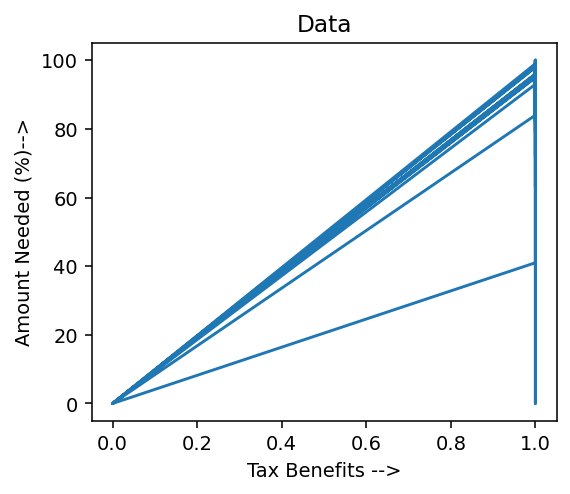

<Figure size 1417.32x1417.32 with 0 Axes>

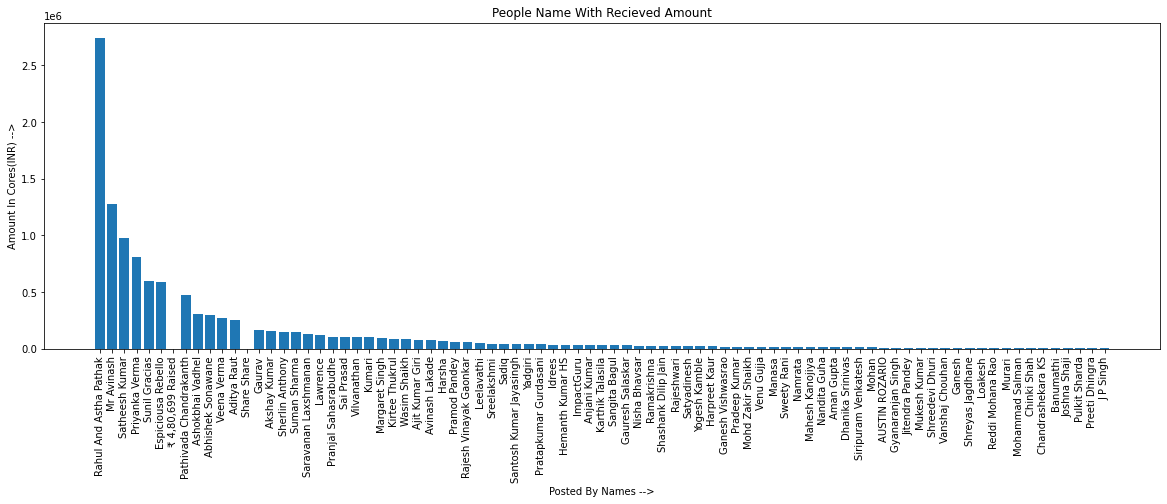

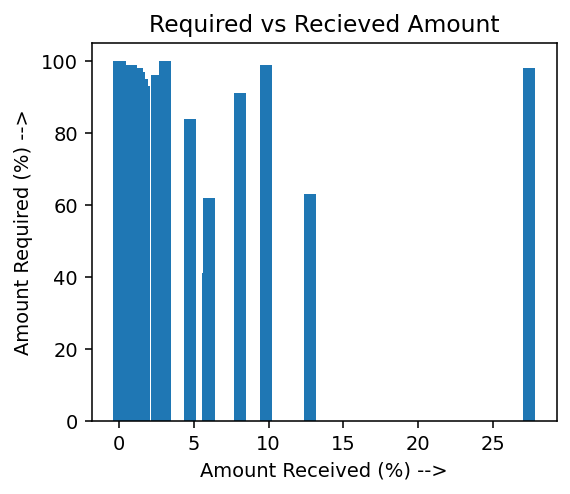

In [6]:
# * Data Visualisation Starts Here
tb = data["TAX_BENEFIT"]
pr = data["PERCENTAGE_REQUIRED"]
x,y = [], []
x=list(tb)
y=list(pr)
my_dpi=140
plt.figure(figsize=(600/my_dpi, 500/my_dpi), dpi=my_dpi)
plt.plot(x,y)
plt.xlabel('Tax Benefits -->')
plt.ylabel('Amount Needed (%)-->')
plt.title('Data')
plt.figure(figsize=(cm_to_inch(50), cm_to_inch(50)))


people_playing_the_sports=data['INR_FUND_RECIVED'] 
sports_name=data['NAME']
plt.figure(figsize=(20,6))
plt.bar(sports_name,people_playing_the_sports)
plt.xticks(rotation=90)
plt.ylabel('Amount In Cores(INR) -->')
plt.xlabel('Posted By Names -->')
plt.title('People Name With Recieved Amount')
plt.show()

per_amt_rec = [(100 * i/10000000) for i in data['INR_FUND_RECIVED']]
per_req = data['PERCENTAGE_REQUIRED']
my_dpi=140
plt.figure(figsize=(600/my_dpi, 500/my_dpi), dpi=my_dpi)
plt.ylabel('Amount Required (%) -->')
plt.xlabel('Amount Received (%) -->')
plt.title('Required vs Recieved Amount')
plt.bar(per_amt_rec,per_req,align="center")
plt.show()